# Patrick Dwyer
## *EDA on UFC Fight Data*
In this project, I will be analyzing a dataset that consists of a row for each UFC fight over the last 10 years. Each fighter is defined randomly as the "Blue" or "Red" corner, and the columns include various fight variables for each fighter. Fight variables include measureables, fight stats, streaks and trends. 

The goal of this project is to better understand what can happen in a fight based on the hundreds of varaibles that go into each bout. To do this, there are several things I want to analyze. 

I want to analyze a few topics of convential wisdom, such as the impact of reach and age to understand if our preconceptions about an MMA fight are leading to results one way or another. 

I also want to analyze a few topics of debate, such as the impact of an empty arena as a result of COVID-19, as well as, the debate on whether a stand-up fighter is better than a Jiu-Jitsu fighter in the sport of MMA.

Lastly, I want to analyze a major topic that I was seperately curious about; the impact of winning and losing on a fighter's future UFC career.

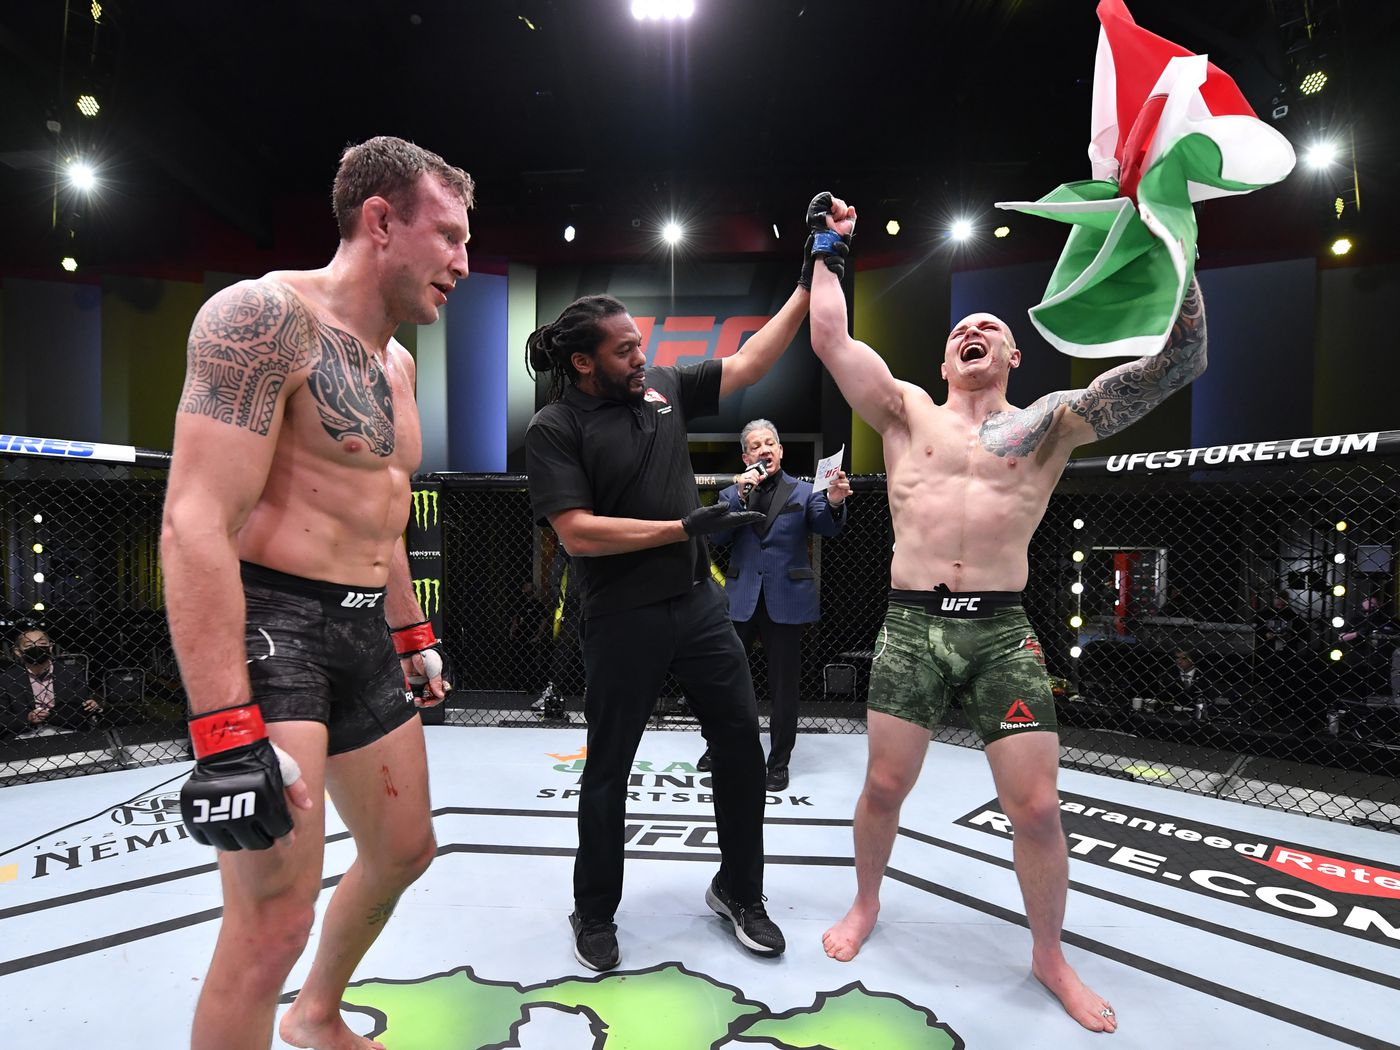

In [1]:
import pandas as pd
import numpy as np

url = 'https://www.kaggle.com/mdabbert/ultimate-ufc-dataset?select=ufc-master.csv'
# Pass data through pandas and into a df.
data = pd.read_csv('ufc-master-3.csv')
ufcdata = pd.DataFrame(data)
# Show basic information about the formatted df.
print("The shape of the DataFrame is",ufcdata.shape)
print("Each fighter has their statistics held in the following columns",ufcdata.columns)
# Show an example row of the df to better understand the data.
pd.set_option('display.max_columns', None)

# Since this is a very large dataset, there are many NaN values for some of the columns as they don't apply to a each fight.
# In this case, there are columns for the official UFC rankings, but each fight only takes place in 1 division, where only 15 fighters are ranked.
# Thus, there are many categorical columns that could just be represented by 0.
# In order to fix this issue, we use the .fillna function to fill empty values with a 0.

ufcdata = ufcdata.fillna(0)

# Next, to further clean the data, we remove the columns at the end of the df because they are only filled out for about half the fights.
# The columns we want to remove begin with "better_rank" and end at the last column of the df.
# This is a seperate issue from the NaN issue becuase filling these columns with 0 would lead to summation errors.

ufcdata.columns.get_loc("better_rank")
ufcdata.drop(ufcdata.iloc[:,107:138],inplace = True, axis = 1)
display(ufcdata.head())

# Now our data is cleaned and ready for our analysis questions! 

The shape of the DataFrame is (4566, 137)
Each fighter has their statistics held in the following columns Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout',
       'B_td_pct_bout', 'R_sub_attempts_bout', 'B_sub_attempts_bout',
       'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object', length=137)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/21,"Las Vegas, Nevada, USA",USA,Blue,False,Heavyweight,MALE,5,0,1,0,4.76,0.58,0.2,0.69,0.70,4,2,26,0,0,1,2,3,0,0,6,Orthodox,200.66,203.20,250,0,2,0,3.71,0.64,0.8,1.44,0.56,11,15,83,1,1,0,4,20,8,0,33,Orthodox,193.04,203.20,265,40,32,0,-1,-7,-27,-13,-57,-1,-17,-8,7.62,0.00,-8,1.05,-0.6,-0.75,1,1,6.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/21,"Las Vegas, Nevada, USA",USA,Red,False,Bantamweight,MALE,3,0,1,1,3.70,0.39,0.3,2.28,0.31,5,8,94,9,0,1,10,5,2,0,18,Orthodox,167.64,172.72,135,0,1,0,6.88,0.48,0.5,1.07,0.50,5,1,14,0,0,1,1,3,1,0,6,Switch,180.34,177.80,135,28,39,0,0,0,12,7,80,9,2,1,-12.70,-5.08,11,-3.18,-0.2,1.21,1,1,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/21,"Las Vegas, Nevada, USA",USA,Red,False,Flyweight,MALE,3,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Southpaw,165.10,172.72,125,1,0,0,4.20,0.47,1.1,1.08,0.36,3,3,21,0,0,1,1,2,2,0,6,Orthodox,165.10,170.18,125,30,27,-1,0,-3,-6,-3,-21,0,-2,-2,0.00,2.54,-3,-4.20,-1.1,-1.08,1,1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/21,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,3,0,5,1,3.98,0.49,1.1,1.75,0.32,5,4,36,0,0,1,4,3,5,0,13,Southpaw,177.80,182.88,155,0,6,0,5.07,0.36,1.0,1.04,0.27,6,2,21,0,0,0,3,3,2,0,8,Orthodox,175.26,187.96,155,36,31,0,-1,-1,5,2,15,0,0,3,2.54,-5.08,-5,-1.09,0.1,0.71,1,1,13.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/21,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,3,2,0,0,2.41,0.33,0.7,3.37,0.38,4,15,87,0,0,3,8,2,4,0,17,Orthodox,170.18,177.80,155,3,0,0,4.23,0.38,0.1,0.51,0.45,4,12,58,0,0,1,6,4,0,0,11,Southpaw,177.80,185.42,155,34,39,-1,0,0,6,3,29,0,-2,4,-7.62,-7.62,5,-1.82,0.6,2.86,1,1,0.0

# Initial Question 1: Jiu Jitsu vs. Stand-up? 

There is an age old debate on which foundation of martial arts is more effective in MMA. Let's compare fights where a primary stand-up fighter fights a primary Jiu Jitsu fighter.

To identify a Jiu-Jitsu specialist, we need to further understand the data. A Jiu-Jisu specialist generally fights by using submission, so we should look at columns such as "win_by_submission" or "avg_SUB_ATT" to identify those fighters. We do this by creating a list of indicies for fights that fit the 'Jiu Jitsu vs. Stand-up' Criteria. As an estimate, the 'Jiu Jitsu vs. Stand-up' Criteria is when one fighter has less than .5 submission attempt per fight (Stand-Up) and the other fighter has more than 1.5 submission attempts (Jiu-Jitsu).

In [2]:
JvK_fight_index_1=[]
JvK_fight_index_2=[]
for fight,stats in ufcdata.iterrows():
  if stats["B_avg_SUB_ATT"]<=.5:
    if stats["R_avg_SUB_ATT"]>=1.5:
      JvK_fight_index_1.append(fight)
  elif stats["B_avg_SUB_ATT"]>=1.5:
    if stats["R_avg_SUB_ATT"]<=.5:
      JvK_fight_index_2.append(fight)

# Now we have parsed through all fights and appended the qualifying fights to 2 lists.

JvK_red = ufcdata.iloc[JvK_fight_index_1]
JvK_blue = ufcdata.iloc[JvK_fight_index_2]

# This creates two new dataframes. 
# JvK_red holds data where the red fighter is the Jiu Jitsu fighter
# JvK_blue holds data where the blue fighter is the Jiu Jitsu fighter

In matchups between the two styles, Jiujitsu fighters won 176 times and Stand-up fighters won 163 Times.


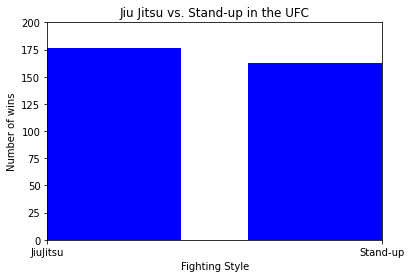

In [3]:
# Where red is the Jiu Jitsu Fighter
jiujitsu = 0
j_list = []
kickboxing = 0
k_list = []
for fight,stats in JvK_red.iterrows():
    if stats["Winner"] == "Red":
      jiujitsu += 1
      j_list.append(fight)
    elif stats["Winner"] == "Blue":
      kickboxing += 1
      k_list.append(fight)

# Where blue is the Jiu Jitsu Fighter
for fight,stats in JvK_blue.iterrows():
    if stats["Winner"] == "Red":
      kickboxing += 1
      k_list.append(fight)
    elif stats["Winner"] == "Blue":
      jiujitsu += 1
      j_list.append(fight)

print("In matchups between the two styles, Jiujitsu fighters won", jiujitsu,"times and Stand-up fighters won",kickboxing,"Times.")

import matplotlib.pyplot as plt
import seaborn as sn
colors = ["JiuJitsu","Stand-up"]
stats = [jiujitsu,kickboxing]
plt.bar(colors,stats,label='JiuJitsu',color ="r")
plt.bar(colors,stats,label='Stand-up',color="b")
plt.plot()
plt.xlabel('Fighting Style')
plt.ylabel('Number of wins')
plt.title('Jiu Jitsu vs. Stand-up in the UFC')
plt.axis(["JiuJitsu", "Stand-up", 0, 200])
plt.show()

This visualization is looking at all fights that were fought between Jiu-Jitsu fighters (1.5 or more Submission Attempts/Fight) and Stand-up fighters (.5 or less Submission Attempts/Fight). In the 339 fights between the two styles, I found that Jiu-Jisu fighters have won 176 times  and Stand-up fighters have won 163 times versus their adversary. When Jiu-Jitsu artists first entered the UFC, they were winning at a rapid rate becuase stand-up fighters had no Jiu-Jisu experience. For example, Royce Gracie, one of the first Jiu-Jitsu specialist in the UFC won his first 9 fights in the UFC, including 8 by Jiu-Jitsu submission. This period is likely why there are more wins for the Jiu-Jitsu style. However, in recent history there have been an increasing number of stand-up fighters that understand how to defend Jiu-Jitsu. This is intriguing and it is worth monitoring as we try and understand the effectivness of each fighting style moving forward.

# Initial Question 2: What can we learn about age in the UFC? In what ways does age affect the way a fight goes?


First lets look at a histogram for the ages. Since each row is a fight, there are two ages per row and 2 histograms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


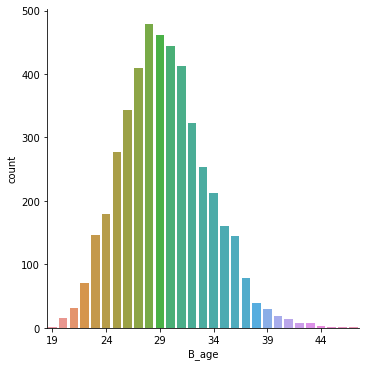

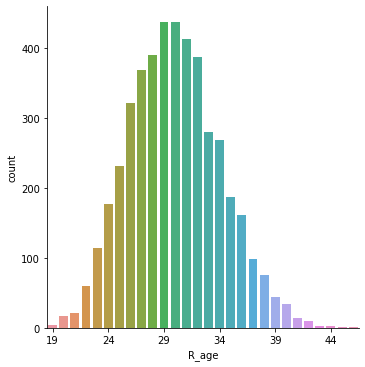

In [4]:
age_b = sn.catplot('B_age',data=ufcdata,kind="count")
age_b.set_xticklabels(step=5)

age_r = sn.catplot('R_age',data=ufcdata,kind="count")
age_r.set_xticklabels(step=5)

These visualizations show the distribution of age for all UFC fighters over time. Most fighters are around 29-30 years old with a right skew that favorites the younger fighters. Next we want to see how this compares to the ages of the winners of each fight. Will the distribution be similar or more skewed in one direction? 

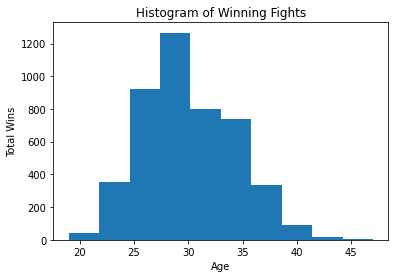

In [5]:
# Next lets compare those histograms to a histogram for all winners to begin to look at how age impacts the fight.
winningages = []
for fight,stats in ufcdata.iterrows():
  if stats["Winner"] == "Blue":
    winningages.append(stats['R_age'])
  if stats["Winner"] == "Red":
    winningages.append(stats['R_age'])
plt.hist(winningages,10)
plt.xlabel('Age')
plt.ylabel('Total Wins')
plt.title('Histogram of Winning Fights')
plt.show()

After comparing the histogram of age of all fighters to the historgam of age of winners, it's evident that there is a similar distribition. The right skew appears to be more drastic for winners which suggests that older fighters are not winning fights at the same rate once they hit a certain age. Now let's determine exactly how much the win rate differs for older fighters than younger fighters by defining a 'Young' and 'Old' age for a fighter, then showing how often those types of fighters have won. 

In [6]:
# Next, lets look at how age has affected the outcomes of fights.
# In order to determine what defines a 'young' vs 'old' fighter, we will take the average age from the 10 years of data.
import statistics as s
import seaborn as sn

avg_age = []
for fighter,stats in ufcdata.iterrows():
  avg_age.append(stats["B_age"]) 
  avg_age.append(stats["R_age"])
av = len(avg_age)
ufcage = sum(avg_age)/av
print("Average Age of UFC Fighters is",ufcage)

# Next we will define old and young by taking the st.dev of the average age. 

agesdv = s.stdev(avg_age)
oldfighters = ufcage+agesdv
youngfighters = ufcage-agesdv
print("Old Fighters are",oldfighters,"or older")
print("Young Fighters are",youngfighters,"or younger")


Average Age of UFC Fighters is 29.723390275952696
Old Fighters are 33.773904788579856 or older
Young Fighters are 25.672875763325536 or younger


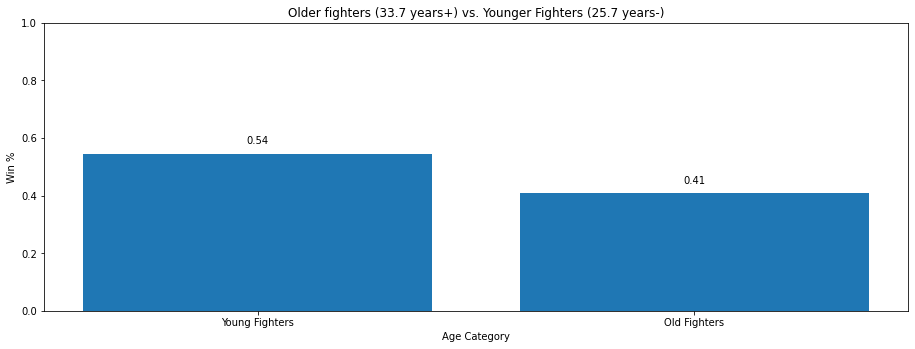

In [7]:
oldwins = []
oldloss = []
oldwinsage = []
youngwins = []
youngloss = []
youngwinsage = []

# Check if a fighter is "Older" or "Younger", then append the wins and losses to seperate lists.

for fighter,stats in ufcdata.iterrows():
  if stats["B_age"] >= oldfighters:
    if stats["Winner"] == "Blue":
      oldwins.append(stats["B_fighter"])
      oldwinsage.append(stats["B_age"])
    else:
      oldloss.append(stats["Winner"])
  elif stats["R_age"] >= oldfighters:
    if stats["Winner"] == "Red":
      oldwins.append(stats["R_fighter"])
      oldwinsage.append(stats["R_age"])
    else:
      oldloss.append(stats["Winner"])
  elif stats["B_age"] <= youngfighters:
    if stats["Winner"] == "Blue":
      youngwins.append(stats["B_fighter"])
      youngwinsage.append(stats["B_age"])
    else:
      youngloss.append(stats["Winner"])
  elif stats["R_age"] <= youngfighters:
    if stats["Winner"] == "Red":
      youngwins.append(stats["R_fighter"])
      youngwinsage.append(stats["R_age"])
    else:
      youngloss.append(stats["Winner"])

# Convert to percentage
old_win_per = len(oldwins)/(len(oldwins)+len(oldloss))
young_win_per = len(youngwins)/(len(youngwins)+len(youngloss))

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
names = ["Young Fighters","Old Fighters"]
winps = [young_win_per,old_win_per]
ax.bar(names,winps)
plt.title('Older fighters (33.7 years+) vs. Younger Fighters (25.7 years-)')
plt.ylim([0,1])
plt.xlabel('Age Category')
plt.ylabel('Win %')
for x,y in zip(names,winps):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.show()

With this visualization, we are able to actually measure the success of 'Young' fighters vs. 'Old' fighters. Clearly, younger fighters are more likley to have success at a 54% win rate while older fighters are only winning at a 41% rate. 

I have several hypothesis for why I believe these results are happening. First, is that it's believed that the older fighters are less likely to be sufficient in multiple forms of martial arts as younger fighters are. This is a result of increased awareness for the sport of MMA, and young kids are now learning multiple foundations of martial arts more than ever before. On the other hand, most older fighters started with one foundation (Kickboxing, Boxing, Muay Thai, Jiu-Jitsu, etc.), and have had to learn bits and pieces of other martial arts foundations along the way. 

Another hypothesis is that chin strength diminishes as a career goes on. 'Chin Strength' can be defined as the ability to take a punch and many fighters have said to experienced this phenomeneon. 

Ultimately, increasing age is clearly a factor one way or another and its impact is even larger than I initialy hypothesized. Next, lets look at a historgram of age for fighters who win in both the young and old categories.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


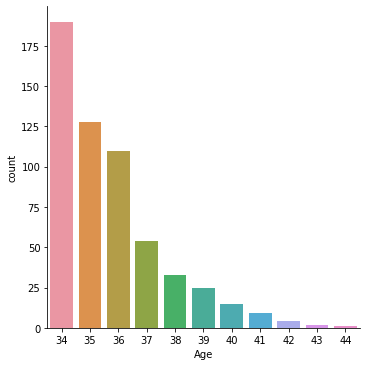

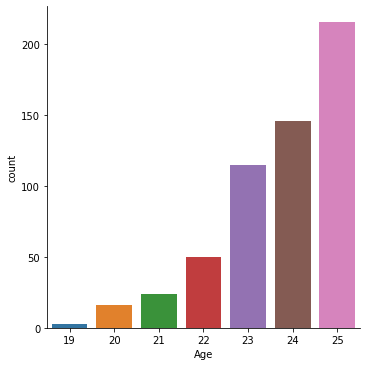

In [8]:
win = []
for i in oldwinsage:
  win.append(1)
list_of_tuples = list(zip(oldwinsage, win))  
olddf = pd.DataFrame(list_of_tuples, columns=["Age","Win"])
olddf
winhistogram = sn.catplot('Age',data=olddf,kind="count")

list_of_tuples_2 = list(zip(youngwinsage, win))  
youngdf = pd.DataFrame(list_of_tuples_2, columns=["Age","Win"])
youngdf
win_younghistogram = sn.catplot('Age',data=youngdf,kind="count")

As expected, the winning age for winning fighters decreases/increases exponentially as the age gets closer to the mean. 

# Initial Question 3: What is the impact of reach in the UFC? 

Reach is a common topic in the UFC when comparing fighters in a matchup. At base level, a longer reach makes it easier to hit your opponent before they hit you. As a result, many UFC fans and analysts talk about the importance of a reach advantage. To what extent does that exsist? Is it significant? Does it increase exponentially as reach advantage increases?


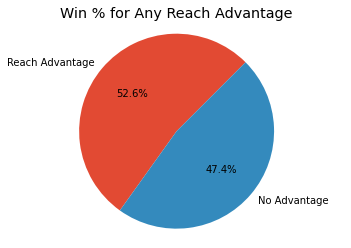

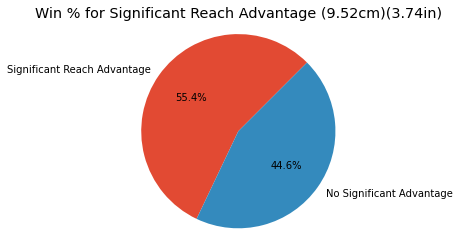

In [9]:
# Using the 'reach_dif' column. We can identify how a reach discrepancy effects the winner of a fight.
ufcdata["reach_dif"].describe()
from statistics import mean 
# Since the mean reach differential is -.24cm and its std is 9.524cm, we can assume the lower and upper bounds.
# If a value is negative, it means that the red fighter has the reach advantage. If positive, blue has a reach advantage.
redadv = []
rednoadv = []
blueadv = []
bluenoadv = []
for fight,stats in ufcdata.iterrows():
  if stats["reach_dif"]<0:
    if stats['Winner'] == 'Red':
      redadv.append(stats["reach_dif"])
    else:
      rednoadv.append(stats["reach_dif"])
  elif stats["reach_dif"]>0:
    if stats['Winner'] == 'Blue':
      blueadv.append(stats["reach_dif"])
    else:
      bluenoadv.append(stats["reach_dif"])
      
advwins = len(redadv)+len(blueadv)
advloss = len(rednoadv)+len(bluenoadv)
advwinpercent = advwins/(advwins+advloss)

# Now lets try using a 'Significant' Reach advantage, which is defined by the difference between the mean and the 9.524cm st dev.
sigredadv = []
sigrednoadv = []
sigblueadv = []
sigbluenoadv = []
for fight,stats in ufcdata.iterrows():
  if stats["reach_dif"]<-9.542:
    if stats['Winner'] == 'Red':
      sigredadv.append(stats["reach_dif"])
    else:
      sigrednoadv.append(stats["reach_dif"])
  elif stats["reach_dif"]>9.542:
    if stats['Winner'] == 'Blue':
      sigblueadv.append(stats["reach_dif"])
    else:
      sigbluenoadv.append(stats["reach_dif"])

sigadvwins = len(sigredadv)+len(sigblueadv)
sigadvloss = len(sigrednoadv)+len(sigbluenoadv)
sigadvwinpercent = sigadvwins/(sigadvwins+sigadvloss)

# Now lets make some visualizations.

#1
plt.style.use('ggplot')
labels = ["Reach Advantage","No Advantage"]
wShare = [advwins,advloss]
plt.pie(wShare, labels=labels, autopct='%.1f%%', startangle=45)
plt.title('Win % for Any Reach Advantage')
plt.axis('equal')
plt.show()

#2
plt.style.use('ggplot')
slabels = ["Significant Reach Advantage","No Significant Advantage"]
swShare = [sigadvwins,sigadvloss]
plt.pie(swShare, labels=slabels, autopct='%.1f%%', startangle=45)
plt.title('Win % for Significant Reach Advantage (9.52cm)(3.74in)')
plt.axis('equal')
plt.show()

Looking at the first pie chart, there is a 52.6% win percentage whenever a fighter has any reach advantage at all. This is a relatively insignificant difference in win%, but could foreshadow a larger relationship between reach and win%.

In the second pie chart, fighters are defined as having a significant reach advantage by taking the standard deviation of all reach differentials over the years. At 9.52cm (3.74in), fighters with a significant reach advantage won at a much highter clip of 55.4% of the time. 

Overall, using these two charts, we can see that a reach advantage does help and likely continues to help as the reach advantage widens. However, having a reach advantage only tells apart of the story. It is apparent that even with a significant reach disadvantage, those fighters can still find other ways to defeat their opponent. 

To further this analysis, lets compare reach advantages between winners and all fighters and see if there is a signifcant advantage.

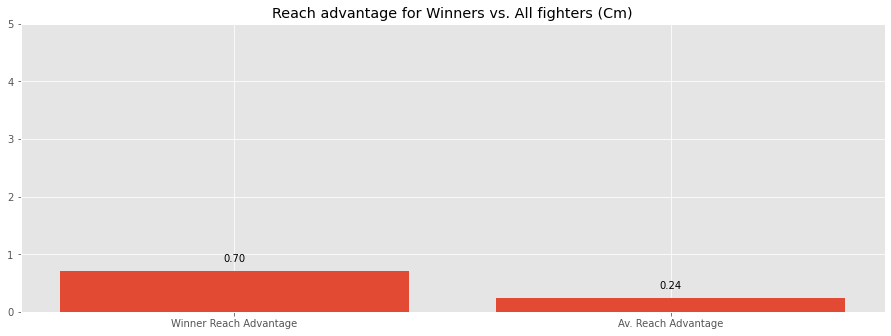

In [10]:
#3
winningreach = []
for fight,stats in ufcdata.iterrows():
  if stats["Winner"]=="Blue":
    if stats["reach_dif"] > 0:
      winningreach.append(stats["reach_dif"])
    else:
      winningreach.append(stats["reach_dif"])
  elif stats["Winner"]=="Red":
    if stats["reach_dif"] < 0:
      winningreach.append(-1*stats["reach_dif"])
    else:
      winningreach.append(-1*stats["reach_dif"])

avwinningreach = mean(winningreach)
ufcav = float(ufcdata["reach_dif"].mean())

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
names = ["Winner Reach Advantage","Av. Reach Advantage"]
reaches = [avwinningreach,abs(ufcav)]
ax.bar(names,reaches)
plt.title('Reach advantage for Winners vs. All fighters (Cm)')
plt.ylim([0,5])
for x,y in zip(names,reaches):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.show()

For all UFC fights, the average reach advantage is .24cm and the average reach advantage for winners is .7cm

After seeing the pie chart results above, this graph was a bit of a surprise. The difference between these values is insignicant and furthers the argument that fighters at a reach disadvantage can still find ways to win their fights at a pretty decent rate.

Overall, reach can play a factor in winning a UFC fight, but the extent is likely overexaggerated by the media and fans. Even with a significant reach advantage, the distribution of winners was still relatively close to even.

# Initial Question 4: To what extent does the empty arena as a result of COVID-19 change the fight outcome? (Underdog Performance)

As a result of COVID-19, the UFC began holding events without fans at UFC 249 on May 5th, 2020 and has continued to do so through March of 2021. Now we have roughly one year of data on fights that don't have fans. 

When asked about fighting without fans, UFC Lightweight Champion Khabib Nurmagomedov said "Honestly, this energy I don't like." Many UFC fighters expect to feel and possibly perform slightly differently without the energy of the fans. 

Lets take a brief look at how fight performance differed when there was an empty arena vs. an arena with fans. One way to measure this is to see if underdogs were more or less likely to win based on the arena. 

Without Fans:
 With average odds of 155.27350427350427 underdogs won at a 0.2925 rate
With Fans:
 With average odds of 153.01563857515205 underdogs won at a 0.27628420547287563 rate


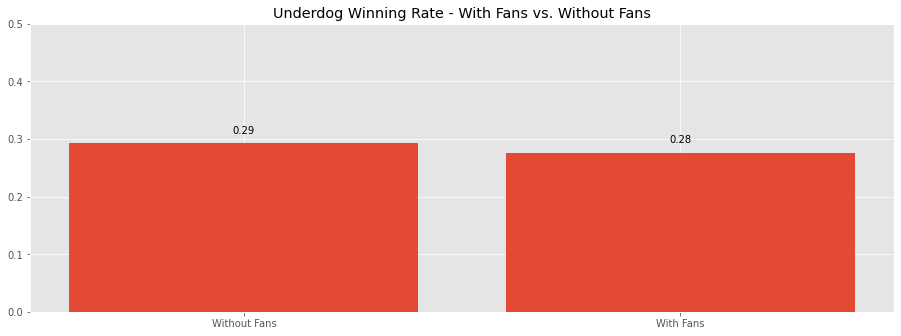

In [11]:
nofansdf = ufcdata[ufcdata["empty_arena"] == 1]
fansdf = ufcdata[ufcdata["empty_arena"] == 0]

# Did having no fans impact expected performance? For example: Did underdogs win at a higher or lower rate without fans?
fanunderdog = []
fanarena = []
for fight,stats in fansdf.iterrows():
  if stats['R_odds'] >= 100 and stats["R_odds"] <= 250:
    if stats['Winner'] == "Red":
      fanunderdog.append(stats["R_odds"]) 
      fanarena.append(stats["empty_arena"])
  elif stats['B_odds'] >= 100 and stats["B_odds"] <= 250:
    if stats['Winner'] == "Blue":
      fanunderdog.append(stats["B_odds"]) 
      fanarena.append(stats["empty_arena"])
nofanunderdog = []
nofanarena = []

for fight,stats in nofansdf.iterrows():
  if stats['R_odds'] >= 100 and stats["R_odds"] <= 250:
    if stats['Winner'] == "Red":
      nofanunderdog.append(stats["R_odds"]) 
      nofanarena.append(stats["empty_arena"])
  elif stats['B_odds'] >= 100 and stats["B_odds"] <= 250:
    if stats['Winner'] == "Blue":
      nofanunderdog.append(stats["B_odds"]) 
      nofanarena.append(stats["empty_arena"])

nofanrate = len(nofanunderdog)/len(nofansdf)
fanrate = len(fanunderdog)/len(fansdf)
print("Without Fans:\n With average odds of",mean(nofanunderdog),"underdogs won at a",nofanrate,"rate")
print("With Fans:\n With average odds of",mean(fanunderdog),"underdogs won at a",fanrate,"rate")

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
names = ["Without Fans","With Fans"]
reaches = [nofanrate,fanrate]
ax.bar(names,reaches)
plt.title('Underdog Winning Rate - With Fans vs. Without Fans')
plt.ylim([0,.5])
for x,y in zip(names,reaches):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.show()

This analysis reveals that having fans hasn't had much of an impact on how the fighters perform. 

When looking closer into the numbers there is a relationship that could exsist and is worth monitoring moving forward. Without fans the underdogs won 29.25% of the time with average odds of +155, but with fans, the underdogs won at a slightly lower clip (27.63%) while still having a slight advantage in odds at +153. This means that without fans underdogs are winning at a slightly higher clip even with slightly worse expectancy to win from the odds. 

However, the sample size is still rather small, as there is less than a year of data without fans and about 9 years of data with fans. Thus, this potential realtionship certainly needs more data to be able to validate this assumption. Since the UFC is currently planning on having fans return in 2021, we may never get an answer to this question. 

# Initial Question # 5: Fighter Longevity: Do wins in the UFC help you stay in the UFC? Do losses force you out of the UFC?



The final topic of analysis is fighter longevity. Earlier in the EDA, we saw that age was a factor in determining the fighters future win%, but now lets see if a relationship exists between total UFC wins or losses and future win%. Since age is likely colinear to total wins or losses, we can expect there to be a point of diminishing returns. Where does that begin?

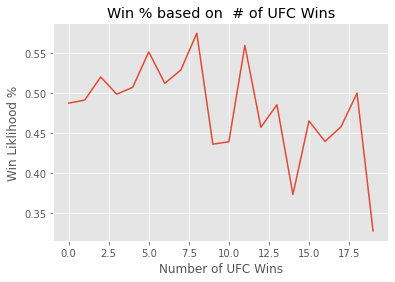

In [12]:
# Make df for each winner then make histogram for each number of R_wins and B_wins.

dfblue = ufcdata[ufcdata["Winner"]=="Blue"]
dfred = ufcdata[ufcdata["Winner"]=="Red"]

# Iterate through dfs.
bwcounts = dfblue['B_wins'].value_counts().to_dict()
rlcounts = dfblue['R_wins'].value_counts().to_dict()

rwcounts = dfred['R_wins'].value_counts().to_dict()
blcounts = dfred['B_wins'].value_counts().to_dict()

# Find the average win percentage for each number of wins.
percentages = {}
for i in range(20):
  percentages[i] = bwcounts[i]/(bwcounts[i]+blcounts[i])
percentages_2 = {}
for i in range(20):
  percentages_2[i] = rwcounts[i]/(rwcounts[i]+rlcounts[i])

# Currently each dictionary includes data from the blue or the red df. Now we need to take the average of the two.
finalwinpercent = {}
for i in range(20):
  finalwinpercent[i] = (percentages[i]+percentages_2[i])/2

# Send dictionary to 2 lists for plotting. 
nwins = list(finalwinpercent.keys())           
wpercent = list(finalwinpercent.values())        

plt.plot(nwins,wpercent)
plt.xlabel("Number of UFC Wins") 
plt.ylabel("Win Liklihood %") 
plt.title('Win % based on  # of UFC Wins') 
plt.show() 

One way to analyze the performance of fighters based on their UFC record was by using a simple line chart. Here we are able to see that as fighters start to win in the UFC, they can expect to experience a higher win % up until roughly 8 UFC wins. Then after 8 wins, there is a point of diminishing returns as the slope of the line begins to become more negative. Now let's take a look at how losing corrilates to UFC win %.

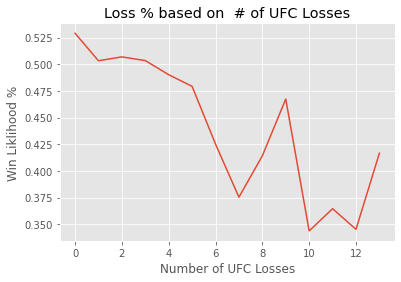

In [13]:
# Iterate through dfs.
blcounts = dfblue['B_losses'].value_counts().to_dict()
rwcounts = dfblue['R_losses'].value_counts().to_dict()

rlcounts = dfred['R_losses'].value_counts().to_dict()
bwcounts = dfred['B_losses'].value_counts().to_dict()

# Find the average win percentage for each number of losses.
percentages = {}
for i in range(14):
  percentages[i] = blcounts[i]/(blcounts[i]+bwcounts[i])
percentages_2 = {}
for i in range(14):
  percentages_2[i] = rlcounts[i]/(rlcounts[i]+rwcounts[i])

# Currently each dictionary includes data from the blue or the red df. Now we need to take the average of the two.
finalwinpercent = {}
for i in range(14):
  finalwinpercent[i] = (percentages[i]+percentages_2[i])/2

# Send dictionary to 2 lists for plotting. 
nlosses = list(finalwinpercent.keys())           
wipercent = list(finalwinpercent.values())        

plt.plot(nlosses,wipercent)
plt.xlabel("Number of UFC Losses") 
plt.ylabel("Win Liklihood %") 
plt.title('Loss % based on  # of UFC Losses') 
plt.show() 

This line chart shows the impact of losing UFC fights on a fighter's future expected win %. 

The key takeaways from the chart include:
 - If a fighter still has 3 or less losses in the UFC, their future win% hardly changes at all and stays between 53% and 50%.
 - Once a fighter losses for the 5th time, there is a severe drop in the slope for expected win % for the rest of the fighter's career.
 - Lastly, once a fighter has lost 10 or more times, they are at a severe disadvantage when predicitng their future win %. 

Ultimately, this EDA provided insight on the performance of UFC fighters considering key varaibles that go into every fight such as age, reach, fans, wins, losses and more.

These insights can best be used for analysts of the game of MMA, fans of the UFC, as well as potential match-makers in fighting organizations around the world. 